## Time Series Prediction with Multilayer Perceptrons

Normalmente, es una buena idea investigar varias técnicas de preparación de datos para **reescalar los datos** y **hacerlos estacionarios**

This is a problem where given a year and a month, the task is to predict the number of
international airline passengers in **units of 1,000**. The data ranges from January 1949 to December
1960 or 12 years, with 144 observations

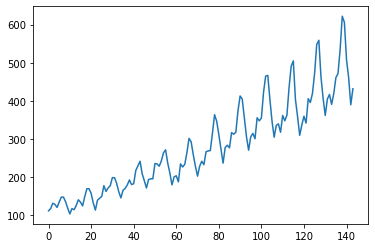

In [1]:
import pandas
import matplotlib.pyplot as plt

dataframe = pandas.read_csv("datos/datoscap24.csv",sep=";",header=0,usecols=[1])
plt.plot(dataframe)
plt.show()

## Multilayer Perceptron Regression

Como primera aproximación al problema intentaremos predecir la cantidad de vuelos con **MPR** y luego con **LSTM**.

Podemos escribir una función sencilla para convertir nuestra única columna de datos en un conjunto de datos de dos columnas. La primera columna contiene el recuento de pasajeros de este mes (t) y la segunda columna contiene el recuento de pasajeros del próximo mes (t+1), que debe predecirse.

In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
# fix random seed for reproducibility
numpy.random.seed(7)

Using TensorFlow backend.


In [3]:

dataset = dataframe.values
dataset = dataset.astype("float32")

In [23]:
dataset.shape

(144, 1)

Hay que tener cuidado en estos casos al momento de separar la data ya que el orden es importante, no podemos hacer un cross-validation como en los problemas de clasificación o regresión.

Intentaremos predecir el ultimo $33\%$ de los datos esto quiere decir los ultimos 48 meses. 

In [4]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [62]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

¿por qué se hace esta tranformacion extraña? simplemente porque nuestro objetivo es sabiendo el valor $t$ queremos predecir el valor $t+1$ entonces si $x=t$ entonces $y=t+1$ 

In [63]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [50]:
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation= "relu" ))
model.add(Dense(1))
model.compile(loss = "mean_squared_error" , optimizer = "adam" )
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
 - 0s - loss: 88319.9338
Epoch 2/200
 - 0s - loss: 73526.2232
Epoch 3/200
 - 0s - loss: 64250.3174
Epoch 4/200
 - 0s - loss: 56985.2054
Epoch 5/200
 - 0s - loss: 51160.9087
Epoch 6/200
 - 0s - loss: 46065.1297
Epoch 7/200
 - 0s - loss: 41635.2593
Epoch 8/200
 - 0s - loss: 37681.9468
Epoch 9/200
 - 0s - loss: 34159.0597
Epoch 10/200
 - 0s - loss: 30955.2437
Epoch 11/200
 - 0s - loss: 28038.5787
Epoch 12/200
 - 0s - loss: 25369.3470
Epoch 13/200
 - 0s - loss: 22946.3542
Epoch 14/200
 - 0s - loss: 20731.0875
Epoch 15/200
 - 0s - loss: 18679.9700
Epoch 16/200
 - 0s - loss: 16807.8282
Epoch 17/200
 - 0s - loss: 15106.9685
Epoch 18/200
 - 0s - loss: 13542.7777
Epoch 19/200
 - 0s - loss: 12118.3972
Epoch 20/200
 - 0s - loss: 10810.5002
Epoch 21/200
 - 0s - loss: 9629.2259
Epoch 22/200
 - 0s - loss: 8565.1962
Epoch 23/200
 - 0s - loss: 7590.9628
Epoch 24/200
 - 0s - loss: 6709.3396
Epoch 25/200
 - 0s - loss: 5929.8486
Epoch 26/200
 - 0s - loss: 5220.0810
Epoch 27/200
 - 0s - loss: 

In [52]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print( "Train Score: %.2f MSE (%.2f RMSE)" % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print( "Test Score: %.2f MSE (%.2f RMSE)" % (testScore, math.sqrt(testScore)))

Train Score: 532.29 MSE (23.07 RMSE)
Test Score: 2356.19 MSE (48.54 RMSE)


Podemos ver que el modelo tiene un error medio de 23 pasajeros (en miles) en el conjunto de datos de entrenamiento y de 48 pasajeros (en miles) en el conjunto de datos de prueba.


In [53]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [54]:
trainX

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

In [55]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
#len(dataset)=>144
trainPredictPlot[:, :] = numpy.nan
print(dataset.shape)


(144, 1)


In [56]:
# corre la grafica en 1 espacio porque si no quedan sobrepuestas 
# no se si esto sea correcto 
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

In [57]:
trainPredictPlot.shape

(144, 1)

In [58]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

In [59]:
trainPredict

array([[113.20847 ],
       [119.176674],
       [133.10248 ],
       [130.11838 ],
       [122.160774],
       [136.08658 ],
       [149.01768 ],
       [149.01768 ],
       [137.08128 ],
       [120.17138 ],
       [105.25088 ],
       [119.176674],
       [116.19257 ],
       [127.13427 ],
       [142.05476 ],
       [136.08658 ],
       [126.13957 ],
       [150.01237 ],
       [170.90108 ],
       [170.90108 ],
       [158.96468 ],
       [134.09718 ],
       [115.197876],
       [141.06009 ],
       [146.03357 ],
       [151.00708 ],
       [178.85867 ],
       [163.93817 ],
       [172.89047 ],
       [178.85867 ],
       [199.74736 ],
       [199.74736 ],
       [184.82687 ],
       [162.94348 ],
       [147.02827 ],
       [166.92227 ],
       [171.89578 ],
       [180.84808 ],
       [193.77917 ],
       [181.84277 ],
       [183.83218 ],
       [218.64667 ],
       [230.58308 ],
       [242.51947 ],
       [209.69437 ],
       [191.78976 ],
       [172.89047 ],
       [194.7

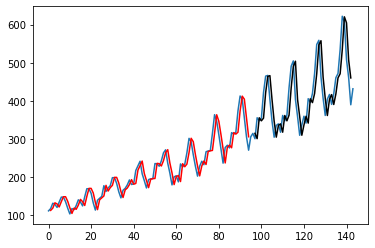

In [60]:
plt.plot(dataset)
plt.plot(trainPredictPlot, color="red")
plt.plot(testPredictPlot, color="black")
plt.show()

 ## Multilayer Perceptron Using the Window Method

También podemos plantear el problema de forma que se puedan utilizar múltiples pasos temporales recientes para hacer la predicción del siguiente paso temporal. Por ejemplo, dado el tiempo actual (t) queremos predecir el valor de (t+1), podemos utilizar el tiempo actual (t) así como t-1 y t-2. Cuando se plantea como un problema de regresión, las variables de entrada son t-2, t-1, t y la variable de salida es t+1. La función create dataset() que escribimos en la sección anterior nos permite crear esta formulación del problema de las series temporales aumentando el argumento look back de 1 a 3. Una muestra del conjunto de datos con esta formulación tiene el siguiente aspecto:

|X1| X2| X3| Y |
| --- | --- | --- | --- |
|112| 118| 132| 129|
|118| 132| 129| 121|
|132| 129| 121| 135|
|129| 121| 135| 148|
|121| 135| 148| 148|

Ejecutamos el ejemplo de la sección anterior con el tamaño de ventana más grande(3).

In [15]:
# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t, t-1, t-2)
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
        return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = pandas.read_csv("datos/datoscap24.csv",sep=";",header=0,usecols=[1])

dataset = dataframe.values
dataset = dataset.astype( "float32" )

In [16]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

# reshape dataset
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation= "relu" ))
model.add(Dense(1))
model.compile(loss= "mean_squared_error" , optimizer= "adam" )
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print( "Train Score: %.2f MSE (%.2f RMSE)" % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print( "Test Score: %.2f MSE (%.2f RMSE)" % (testScore, math.sqrt(testScore)))

# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict



96 48
Epoch 1/200
 - 0s - loss: 22821.0215
Epoch 2/200
 - 0s - loss: 22744.1387
Epoch 3/200
 - 0s - loss: 22641.0293
Epoch 4/200
 - 0s - loss: 22521.2266
Epoch 5/200
 - 0s - loss: 22389.9199
Epoch 6/200
 - 0s - loss: 22250.4824
Epoch 7/200
 - 0s - loss: 22105.3145
Epoch 8/200
 - 0s - loss: 21956.1797
Epoch 9/200
 - 0s - loss: 21804.4316
Epoch 10/200
 - 0s - loss: 21651.1172
Epoch 11/200
 - 0s - loss: 21497.0703
Epoch 12/200
 - 0s - loss: 21342.9336
Epoch 13/200
 - 0s - loss: 21189.2285
Epoch 14/200
 - 0s - loss: 21036.3652
Epoch 15/200
 - 0s - loss: 20884.6680
Epoch 16/200
 - 0s - loss: 20734.3965
Epoch 17/200
 - 0s - loss: 20585.7520
Epoch 18/200
 - 0s - loss: 20438.8848
Epoch 19/200
 - 0s - loss: 20293.9238
Epoch 20/200
 - 0s - loss: 20150.9453
Epoch 21/200
 - 0s - loss: 20010.0176
Epoch 22/200
 - 0s - loss: 19871.1777
Epoch 23/200
 - 0s - loss: 19734.4453
Epoch 24/200
 - 0s - loss: 19599.8379
Epoch 25/200
 - 0s - loss: 19467.3516
Epoch 26/200
 - 0s - loss: 19336.9648
Epoch 27/200
 -

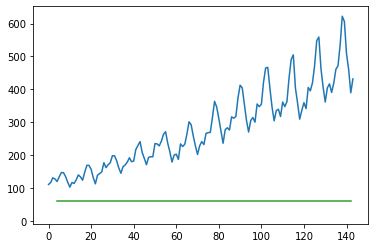

In [17]:
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

esta bien pinche raro el codigo 